# Capstone project

In [10]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Methodology:
1. Introduction to the problem
2. Data
3. EDA(exploratory data analysis)<br/>
   I. data dimension<br/>
   II. data sample<br/>
   III. features/columns<br/>
   IV. check duplicate value<br/>
   V. Target variable(depended feature) analysis<br/>
   VI. missing values and data types
4. Data preparation <br/>
   I. data cleaning(drop columns and filling missing values) <br/>
   II. data engineering <br/>
   III. handle outliers <br/>
   IV. data encoding
5. Feature Selection <br/>
   I. Univariate Selection <br/>
   II. Feature Importance<br/>
   III. Correlation Matrix with Heatmap
6. Model Building. 
7. Model Evaluation
8. Conclusion

<h1> 1. Introduction to the problem

For a long time, car collisions have been the center of commuter's stress points. And since everyone owns a car in the US, the statement that most Americans are also commuters is hardly an understatement. Whether if the collision happens to us, our loved ones, or a stranger, it all affects us financially or emotionally the same. Hence we are all stakeholders here. So what conditions can cause collision? Can we avoid it? And let's face it, since collisions happen so frequently, if we can't completely avoid it, can we at least choose an option that minimizes the severity?

<h1> 2. Data

In [11]:
df = pd.read_csv('../Data-Collisions.csv')

C:\Users\leo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The data we will be using is provided by SPD(seattle police department) and recorded by Traffic Records. The time frame of the data starts from 2004 to present and it has been updated weekly. The data consists of 194673 collisions and 37(not counting index) attributes/columns with the target/dependent variable/feature 'SEVERITYCODE' and 36 independent variables/features. Although metadata dictates that there are 5 severity codes(0-3, 2b), the data frame consists of only 1(136486) or 2(58188). Therefore, each attribute will be used to classify whether they belong to 'SEVERITYCODE' 1 or 2. Before that, we will fill the missing values or deleted columns with large amount of missing values. After the data is properly prepared, we will encode the categorical features and normalize it along with numerical features before testing their relevance to target variable 'SEVERITYCODE'. The final step will be to select a hand full of relevant features and feed it to the model.

# 3. EDA(exploratory data analysis):
    I. data dimension
    II. data sample
    III. features/columns
    IV. check duplicate value
    V. Target variable(depended feature) analysis
    VI. missing values and data types

**I. data dimension**

In [15]:
# dimenson
df.shape

(194673, 38)

**II. data sample**

In [8]:
# a quick look
pd.set_option('display.max_columns', None)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


**III. features/columns**

In [9]:
# features
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

**IV. check duplicate value**

In [24]:
# check to make sure we don't have any duplicated values
df.duplicated().value_counts()

False    194541
True        132
dtype: int64

**V. Target variable(depended feature) analysis**

,SEVERITYCODE
1,136485
2,58188


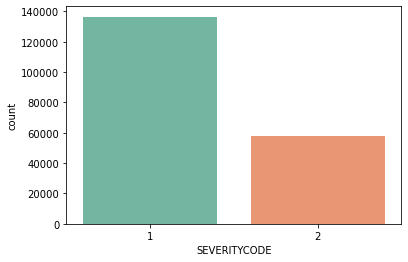

In [18]:
# graph of target variable
sn.countplot(x="SEVERITYCODE", data=df, palette = "Set2")

# table of target variable
df['SEVERITYCODE'].value_counts().to_frame()

According to meta-data <br/>
1 = property damage <br/>
2 = injury <br/>
It seems like property damage happens more frequenly than injury. That's a good thing.

**VI. missing values and data types**

In [19]:
# missing values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

After examining meta-data, it seems all the data are in the right data type. So there is no need for data casting, though there is a good amount of missing datas that we need to address so lets move on to data cleaning. Before that, we need to have a visual of the missing datas.

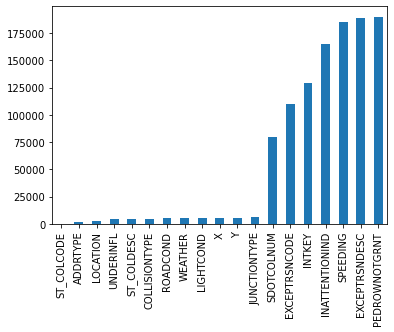

In [6]:
# graph of missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

I will delete features with more than 75000 missing values.

# 4. Data preparation:
    I. data cleaning(drop columns and filling missing values) 
    II. data engineering 
    III. handle outliers 
    IV. data encoding

**I. Data cleaning**<br/>
drop unessessary features

In [111]:
# I also drop SEVERITYDESC because it's redondent because we already know what severitycode 1 and 2 means

# I dropped the 'ST_COLDESC' and 'SDOT_COLDESC' because they are descriptions of ST_COLCODE and SDOT_COLCODE respectivly

# since pd data frame comes with unique ID we do not need 'OBJECTID' that comes with the data

# I will drop 'INCKEY' and 'COLDETKEY' because they are abstract tools to catagorize data that has no real world implication

# I will drop 'SEVERITYCODE.1' because it is a redondent value of 'SEVERITYCODE'

# I will drop 'INCDATE'because it is a redondent value of 'INCDTTM'

# I dropped location because it is a redonent value of 'X' and 'Y'

# Meta-data has no documentation on 'REPORTNO' so I am going to drop it

# over 90% of 'CROSSWALKKEY' and 'SEGLANEKEY 'takes on the value of 0, so I will drop both
df.drop([
    'OBJECTID', 'INCKEY', 'COLDETKEY', 'SEVERITYCODE.1', 'INCDATE', 'LOCATION', 'REPORTNO',
    'ST_COLDESC', 'SDOTCOLNUM', 'EXCEPTRSNCODE', 'INTKEY', 'INATTENTIONIND', 'CROSSWALKKEY',
    'SPEEDING', 'EXCEPTRSNDESC', 'PEDROWNOTGRNT', 'SEVERITYDESC', 'SEGLANEKEY', 'SDOT_COLDESC'], axis=1, inplace=True)

In [7]:
display(df['SEGLANEKEY'].value_counts().to_frame())
display(df['CROSSWALKKEY'].value_counts().to_frame())

,SEGLANEKEY
0,191907
6532,19
6078,16
12162,15
10336,14
...,...
35157,1
10817,1
15043,1
525169,1


,CROSSWALKKEY
0,190862
523609,17
520838,15
525567,13
521707,10
...,...
521019,1
630862,1
25545,1
523322,1


**II. Data Engineering(from left to right)**<br/>
fill in missing values with mean or most frequent value, combine features

<h5> ADDRTYPE

SEVERITYCODE
ADDRTYPE     SEVERITYCODE              
Alley        1                 0.890812
             2                 0.109188
Block        1                 0.764947
             2                 0.235053
Intersection 1                 0.572476
             2                 0.427524

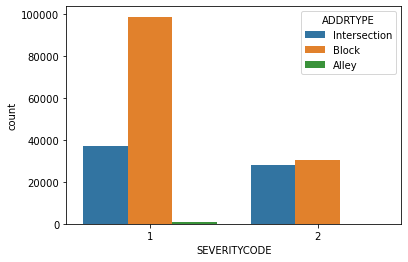

In [112]:
# Since "Block" is the most frequent option in ADDRTYPE, we will fill all the missing value with it.
df['ADDRTYPE'] = df['ADDRTYPE'].fillna('Block')

# display graph in relation to SEVERITYCODE
sn.countplot(data=df, x='SEVERITYCODE', hue='ADDRTYPE')

# display table in relation to SEVERITYCODE
df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

It seems like there are some relationship between ADDRTYPE and SEVERITYCODE. We will note that and add this feature later in feature selection section.

<h5> UNDERINFL

SEVERITYCODE
UNDERINFL SEVERITYCODE              
N         1                 0.705603
          2                 0.294397
Y         1                 0.609473
          2                 0.390527

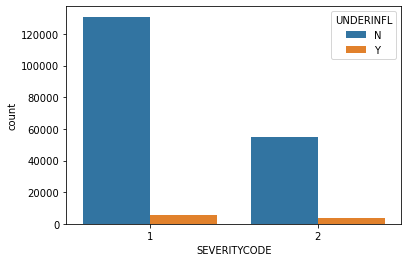

In [113]:
# fillna with the most frequent value 'N'
df['UNDERINFL'] = df['UNDERINFL'].fillna('N')

# Since N and 0(Y and 1) essentially means the same thing so we will combine N with 0 and Y with 1
df['UNDERINFL'] = df['UNDERINFL'].replace({'0': 'N', '1': 'Y'})

# display graph in relation to SEVERITYCODE
sn.countplot(data=df, x='SEVERITYCODE', hue='UNDERINFL')

# display table in relation to SEVERITYCODE
df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

<h5> COLLISIONTYPE

SEVERITYCODE
COLLISIONTYPE SEVERITYCODE              
Angles        1                 0.607083
              2                 0.392917
Cycles        2                 0.876085
              1                 0.123915
Head On       1                 0.569170
              2                 0.430830
Left Turn     1                 0.605123
              2                 0.394877
Other         1                 0.742142
              2                 0.257858
Parked Car    1                 0.929988
              2                 0.070012
Pedestrian    2                 0.898305
              1                 0.101695
Rear Ended    1                 0.569639
              2                 0.430361
Right Turn    1                 0.793978
              2                 0.206022
Sideswipe     1                 0.865334
              2                 0.134666

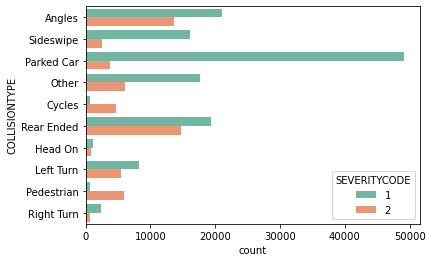

In [114]:
# fillna with most frequent value
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna('Parked Car')

# display graph in relation to SEVERITYCODE
sn.countplot(data=df, y='COLLISIONTYPE', hue='SEVERITYCODE', palette="Set2")

# display table in relation to SEVERITYCODE
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

<h5> ROADCOND

SEVERITYCODE
ROADCOND SEVERITYCODE              
Dry      1                 0.682494
         2                 0.317506
Other    1                 0.925949
         2                 0.074051
Wet      1                 0.668134
         2                 0.331866

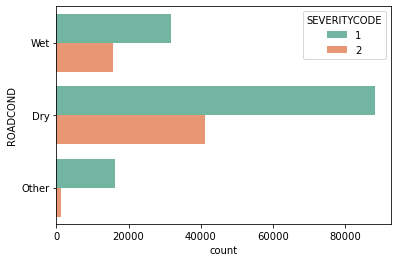

In [115]:
# fillna with the most frequent value
df['ROADCOND'] = df['ROADCOND'].fillna('Dry')

# Combining minor features to others
df['ROADCOND'] = df['ROADCOND'].replace({'Sand/Mud/Dirt': 'Other', 'Snow/Slush': 'Other', 'Standing Water': 'Other', 
                                         'Ice': 'Other', 'Oil': 'Other', 'Unknown': 'Other'})

# display graph in relation to SEVERITYCODE
sn.countplot(data=df, y='ROADCOND', hue='SEVERITYCODE', palette="Set2")

# display table in relation to SEVERITYCODE
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

contrary to my inital belief that more collisions happen on wet or ice roads, most collisions happens just on dry road condition. But that could be because there are simply more cars on the road during dry conidtion(however seattle has good amount of raining seasons...). But number of accident is outside of our focus. Keep in mind our goal is to see whether if these conditoins leads to servierty code 1(property damage) or 2(injuries)

<h5> WEATHER

SEVERITYCODE
WEATHER  SEVERITYCODE              
Clear    1                 0.682281
         2                 0.317719
Other    1                 0.923685
         2                 0.076315
Overcast 1                 0.684456
         2                 0.315544
Raining  1                 0.662815
         2                 0.337185

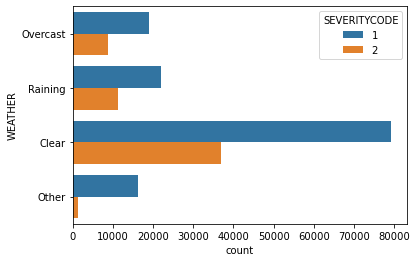

In [116]:
# fillna with the most frequent value
df['WEATHER'] = df['WEATHER'].fillna('Clear')

# Combining minor features to others
df['WEATHER'] = df['WEATHER'].replace({'Blowing Sand/Dirt': 'Other', 'Snowing': 'Other', 'Partly Cloudy': 'Other', 
                                        'Severe Crosswind': 'Other', 'Sleet/Hail/Freezing Rain': 'Other', 
                                        'Fog/Smog/Smoke': 'Other', 'Unknown': 'Other'})

# display graph in relation to SEVERITYCODE
sn.countplot(data=df, y='WEATHER', hue='SEVERITYCODE')

# display table in relation to SEVERITYCODE
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

Again, I am very surprise to see more accidents happen under clear weather condition. As I mentioned before, this could be due to the fact that there are just more ppl on the road. Either way is none of our concer, it's just interesting...

<h5> LIGHTCOND

SEVERITYCODE
LIGHTCOND               SEVERITYCODE              
Dark                    1                 0.762427
                        2                 0.237573
Dark - Street Lights On 1                 0.701575
                        2                 0.298425
Dawn                    1                 0.670663
                        2                 0.329337
Daylight                1                 0.673275
                        2                 0.326725
Dusk                    1                 0.670620
                        2                 0.329380
Other                   1                 0.952072
                        2                 0.047928

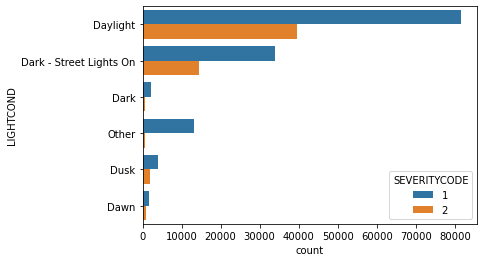

In [117]:
# fillna with the most frequent value combine similar features: no street lights + street lights off, street lights 
# on + unknown lighting
df['LIGHTCOND'] = df['LIGHTCOND'].fillna('Daylight')
df['LIGHTCOND'] = df['LIGHTCOND'].replace({'Dark - No Street Lights': 'Dark', 
                                           'Dark - Street Lights Off': 'Dark', 
                                           'Dark - Unknown Lighting': 'Dark - Street Lights On',
                                           'Unknown': 'Other'})

# display graph in relation to SEVERITYCODE
sn.countplot(data=df, y='LIGHTCOND', hue='SEVERITYCODE')

# display table in relation to SEVERITYCODE
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

<h5> JUNCTIONTYPE

SEVERITYCODE
JUNCTIONTYPE                                      SEVERITYCODE              
At Intersection (but not related to intersection) 1                 0.703051
                                                  2                 0.296949
At Intersection (intersection related)            1                 0.567362
                                                  2                 0.432638
Driveway Junction                                 1                 0.696936
                                                  2                 0.303064
Mid-Block (but intersection related)              1                 0.679816
                                                  2                 0.320184
Mid-Block (not related to intersection)           1                 0.793984
                                                  2                 0.206016
Ramp Junction                                     1                 0.674699
                                                  2                 0.325301

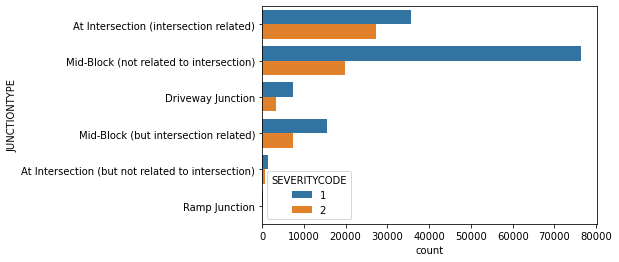

In [118]:
# fillna with the most frequent value
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna('Mid-Block (not related to intersection)')

# combine unknown with the most frequent value
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace({'Unknown': 'Mid-Block (not related to intersection)'})

# display graph in relation to SEVERITYCODE
sn.countplot(data=df, y='JUNCTIONTYPE', hue='SEVERITYCODE')

# display table in relation to SEVERITYCODE
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

<h5> PERSONCOUNT

SEVERITYCODE
PERSONCOUNT SEVERITYCODE              
0           1                 0.682179
            2                 0.317821
1           1                 0.749430
            2                 0.250570
2           1                 0.756537
            2                 0.243463
3           1                 0.621382
            2                 0.378618
4           1                 0.570600
            2                 0.429400
5           1                 0.549058
            2                 0.450942
6           2                 0.524358
            1                 0.475642

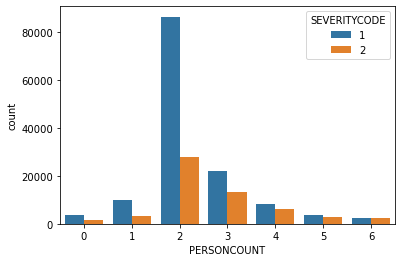

In [119]:
# we are binning 6 or more to one group: 6
df['PERSONCOUNT'] = df['PERSONCOUNT'].replace({81: 6, 54: 6, 57: 6, 48: 6, 43: 6, 41: 6, 39: 6, 35: 6, 31: 6, 53: 6, 23: 6,
                                               24: 6, 30: 6, 21: 6, 36: 6, 29: 6, 28: 6, 27: 6, 37: 6, 47: 6, 34: 6, 32: 6,
                                               26: 6, 22: 6, 19: 6, 18: 6, 25: 6, 20: 6, 44: 6, 13: 6, 14: 6, 15: 6, 16: 6,
                                               17: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6})

# graph of PERSONCOUNT in relation to SEVERITYCODE
sn.countplot(data=df, x='PERSONCOUNT', hue='SEVERITYCODE')

# table of PERSONCOUNT in relation to SEVERITYCODE
df.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

<h5> PEDCOUNT

SEVERITYCODE
PEDCOUNT SEVERITYCODE              
0        1                 0.723295
         2                 0.276705
1        2                 0.898579
         1                 0.101421
2        2                 0.915929
         1                 0.084071
3        2                 0.964286
         1                 0.035714

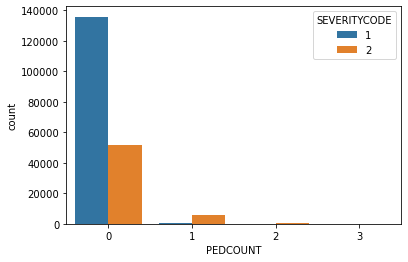

In [120]:
# binning 3, 4, 5, 6 as one group
df['PEDCOUNT'] = df['PEDCOUNT'].replace({4: 3, 6: 3, 5: 3})

# graph of PEDCOUNT in relation to SEVERITYCODE
sn.countplot(data=df, x='PEDCOUNT', hue='SEVERITYCODE')

# table of PEDCOUNT in relation to SEVERITYCODE
df.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

<h5>VEHCOUNT

SEVERITYCODE
VEHCOUNT SEVERITYCODE              
0        1                 0.758702
         2                 0.241298
1        2                 0.547810
         1                 0.452190
2        1                 0.756526
         2                 0.243474
3        1                 0.579554
         2                 0.420446
4        1                 0.555647
         2                 0.444353
5        1                 0.523873
         2                 0.476127

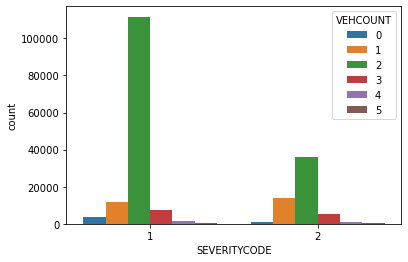

In [121]:
# binning 5 or more into one catagory
df['VEHCOUNT'] = df['VEHCOUNT'].replace({12: 5, 10: 5, 11: 5, 9: 5, 8: 5, 7: 5, 6: 5})

# graph of VEHCOUNT in relation to SEVERITYCODE
sn.countplot(data=df, x='SEVERITYCODE', hue='VEHCOUNT')

# table of VEHCOUNT in relation to SEVERITYCODE
df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

In [122]:
# fillna with mean value
df['X'].fillna(value=df['X'].mean(), inplace=True)
df['Y'].fillna(value=df['Y'].mean(), inplace=True)

In [6]:
import folium as f
from folium.plugins import MarkerCluster

m = f.Map(location=[df['Y'].mean(), df['X'].mean()], zoom_start=10)

In [7]:
mc = MarkerCluster()
df_map = df.sample(frac = 0.01) 

# beacuase computer keep on freezing due to large amount of data so I only ran through 1900 random cases
for row in df_map.itertuples():
    mc.add_child(f.Marker(location=[row.Y, row.X], popup=row.index))

m.add_child(mc)

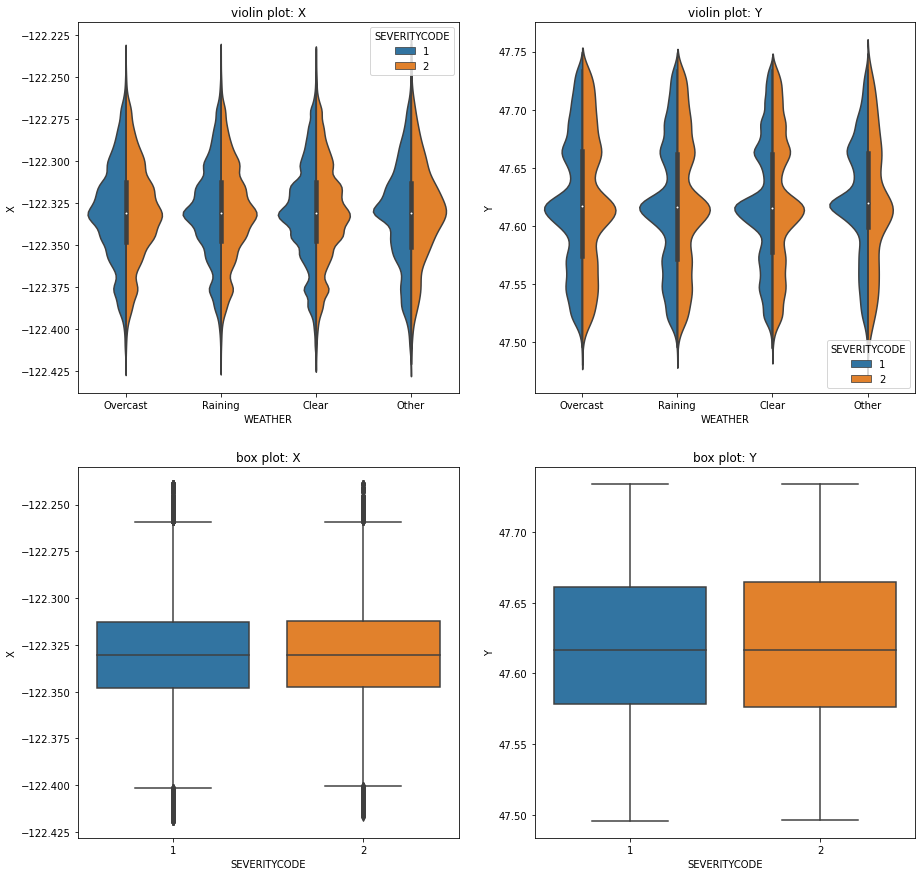

In [15]:
fig,a =  plt.subplots(2,2)

fig.set_figheight(15)
fig.set_figwidth(15)
a[0][0].set_title('violin plot: X')
sn.violinplot(x='WEATHER', y='X', data=df, split=True, hue='SEVERITYCODE', ax=a[0][0])
a[0][1].set_title('violin plot: Y')
sn.violinplot(x='WEATHER', y='Y', data=df, split=True, hue='SEVERITYCODE', ax=a[0][1])
a[1][0].set_title('box plot: X')
sn.boxplot(x="SEVERITYCODE", y="X", data=df, ax=a[1][0])
a[1][1].set_title('box plot: Y')
sn.boxplot(x="SEVERITYCODE", y="Y", data=df, ax=a[1][1])

My inital thought was that there should be a huge relationship between severitycode and location, but after spending a whole day twiking it, turns out that there is very little. Therefore, we will test to see how our models performs with and without X and Y features. And base on the result, we will decide if we should include them or not. My prediction is that this feature might cause our model to over-fit. Also I did find a cool way to see the accidents via map(it doesn't really help anything, but it's pretty cool, hope you enjoy it)

**III. Handle outliers**<br/>
SDOT_COLCODE and ST_COLCODE

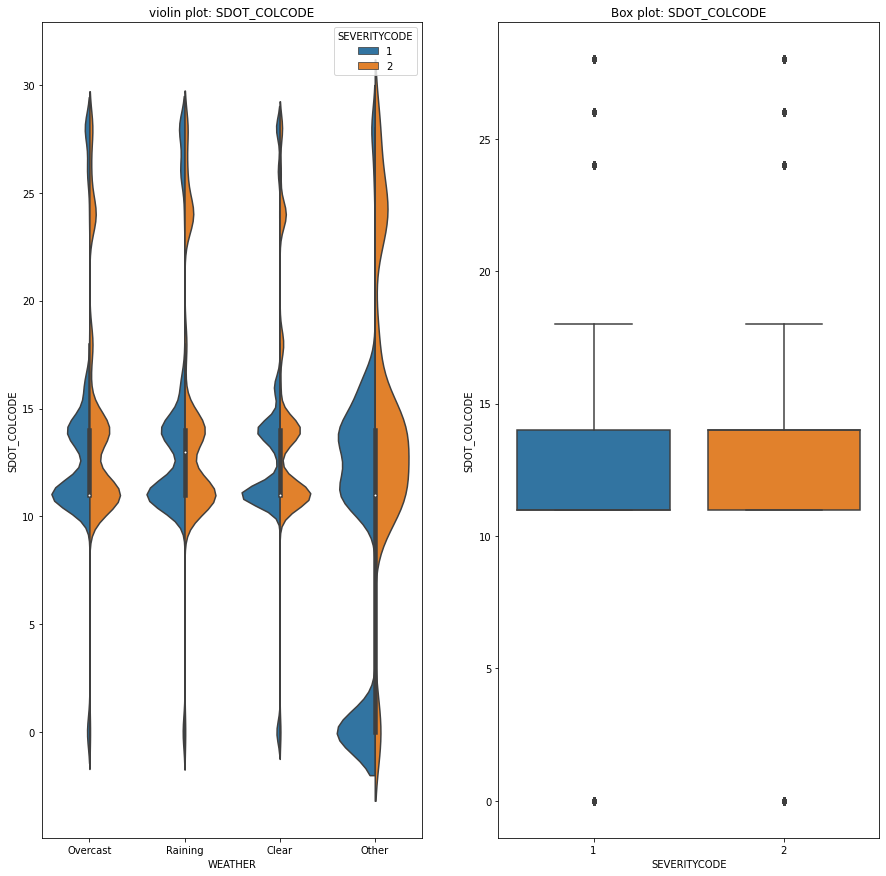

In [125]:
# graph of SDOT_COLCODE in relation to SEVERITYCODE
fig,a =  plt.subplots(1,2)

fig.set_figheight(15)
fig.set_figwidth(15)
a[0].set_title('violin plot: SDOT_COLCODE')
sn.violinplot(x='WEATHER', y='SDOT_COLCODE', data=df, split=True, hue='SEVERITYCODE', ax=a[0])
a[1].set_title('Box plot: SDOT_COLCODE')
sn.boxplot(x="SEVERITYCODE", y="SDOT_COLCODE", data=df, ax=a[1])

In [22]:
df['SDOT_COLCODE'].value_counts()

11    88544
14    54299
16     9928
0      9787
28     8856
24     6518
13     5852
26     4741
18     3104
15     1604
12     1440
Name: SDOT_COLCODE, dtype: int64

In [124]:
# since a large portion of numbers only shows up 1- 500 times, I changed their value to most frequent value.
df['SDOT_COLCODE'] = df['SDOT_COLCODE'].replace({47: 11, 52: 11, 46: 11, 36: 11, 68: 11, 58: 11, 35: 11, 61: 11, 44: 11, 53: 11,
                                                 23: 11, 32: 11, 22: 11, 66: 11, 55: 11, 33: 11, 69: 11, 64: 11, 34: 11, 25: 11,
                                                 31: 11, 48: 11, 23: 11, 54: 11, 27: 11, 56: 11, 21: 11, 29: 11, 51: 11})

To my surprise, there is a huge relationship between SDOT_COLCODE and target variable. I almost deleted this feature because I didn't know how to manipulate the data into readable graphs, luckly after a few tries, it paid off.

C:\Users\leo\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


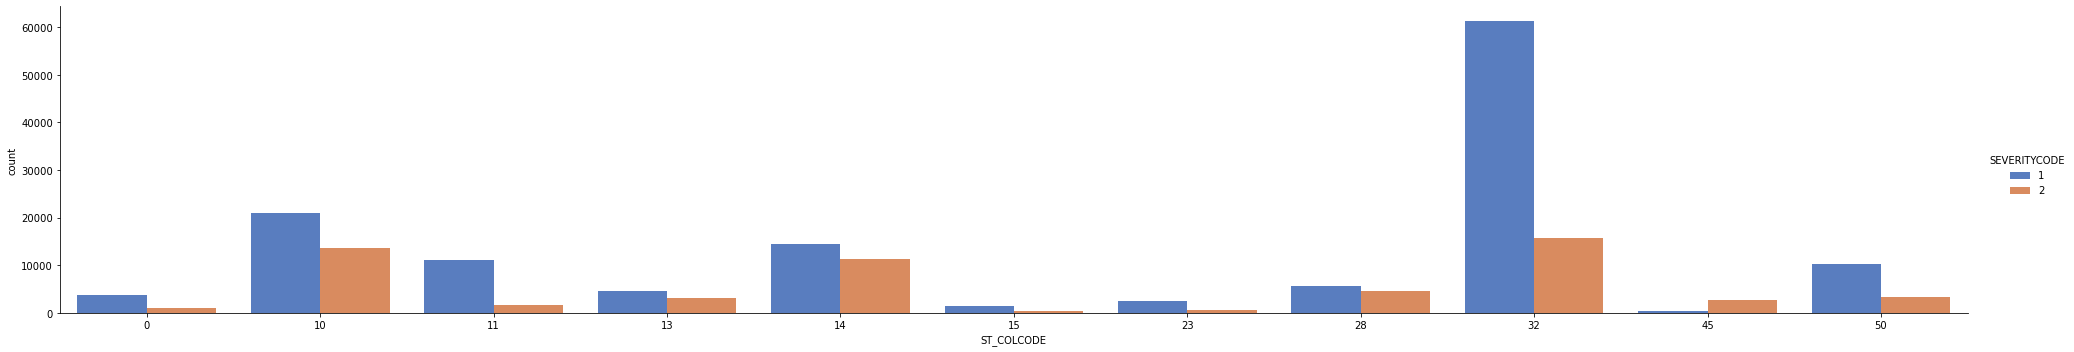

In [132]:
df['ST_COLCODE'] = df['ST_COLCODE'].fillna(32)

# graph of ST_COLCODE in relation to SEVERITYCODE
g = sn.factorplot(x="ST_COLCODE", data=df, aspect=5.5, kind='count', hue='SEVERITYCODE', palette="muted")

In [131]:
# we do not need ST_COLCODES that rearly appears
df_counts = df['ST_COLCODE'].value_counts().to_frame()
df_counts

,ST_COLCODE
32,76938
10,34674
14,25771
50,13554
11,12777
28,10324
13,7629
0,4886
45,3092
23,2990


In [129]:
# find out what values appeared less than 2000 times
codes_less_than_1k = df_counts[(df_counts['ST_COLCODE']<2000)].index
codes_less_than_1k

Index([ '0', '16', '20',   45,   23,  '2', '12',   22,   15, '22',   16,   20,
         21, '30',   12,    0,  '1', '71', '21', '26',    2, '81', '52', '19',
        '5',   71,   30, '24',    1,   26,   52,   19,   81,  '6', '51',   24,
       '29', '74',   74, '27',  '3',   51, '73', '25',   29,  '4',    3,   27,
       '57', '40', '83', '84',   73, '72', '41', '31',   64,   25,   57,   84,
         40,   72, '56',  '8', '48',   83, '82',    4, '53',  '7',   41, '64',
         82,   56,   31,   48, '17',   65,   53, '88', '42', '54', '66', '18',
         66, '67',   42,   67, '65', '87', '43', '85', '60',   43,   87,   54,
       '49'],
      dtype='object')

In [130]:
# replace those values with the most frequent values
df['ST_COLCODE'] = df['ST_COLCODE'].replace({'0': 32, '16': 32, '20': 32, 45: 32, 23: 32, '2':32, '12':32, 22: 32, 15: 32, 
                                             '22': 32, 16: 32, 20: 32, 21: 32, '30': 32, 12: 32, 0: 32, '1': 32, '71': 32,
                                             '21': 32, '26': 32, 2: 32, '81': 32, '52': 32, '19': 32, '5': 32, 71: 32, 30: 32,
                                             '24': 32, 1: 32, 26: 32, 52: 32, 19: 32, 81: 32, '6': 32, '51': 32, 24: 32,
                                             '29': 32, '74': 32, 74: 32, '27': 32, '3': 32, 51: 32, '73': 32, '25': 32, 29: 32,
                                             '4': 32, 3: 32, 27: 32, '57': 32, '40': 32, '83': 32, '84': 32, 73: 32, '72': 32,
                                             '41': 32, '31': 32, 64: 32, 25: 32, 57: 32, 84: 32, 40: 32, 72: 32, '56': 32, 
                                             '8': 32, '48': 32, 83: 32, '82': 32, 4: 32, '53': 32, '7': 32, 41: 32, '64': 32,
                                             82: 32, 56: 32, 31: 32, 48: 32, '17': 32, 65: 32, 53: 32, '88': 32, '42': 32,
                                             '54': 32, '66': 32, '18': 32, 66: 32, '67': 32, 42: 32, 67: 32, '65': 32, '87': 32,
                                             '43': 32, '85': 32, '60': 32, 43: 32, 87: 32, 54: 32, '49': 32, '32': 32, '11': 11,
                                             '14': 14, '10': 10, '13': 13, ' ': 0, '50': 50})

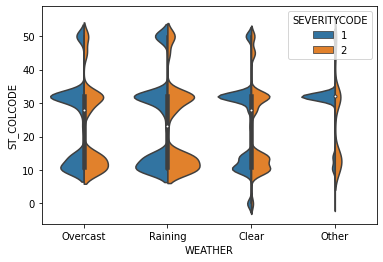

In [133]:
sn.violinplot(x='WEATHER', y='ST_COLCODE', data=df, split=True, hue='SEVERITYCODE')

Again, same with SDOT_COLCODE, I almost deleted the feature because I didn't find a way to display the data in a meaningful way. There is a huge relationship between ST_COLCODE and target variable. We will definiatly include these 2 features in training our model.

**IV. Data encoding**<br/>
    (Not all features need to be encoded, only features that does not have numric values)

In [134]:
# feature encoding UNDERINFL
df['UNDERINFL'] = df['UNDERINFL'].replace({'N': 0, 'Y': 1})

# feature encoding ADDRTYPE
df['ADDRTYPE'] = df['ADDRTYPE'].replace({'Block': 0, 'Intersection': 1, 'Alley': 2})

# feature encoding COLLISIONTYPE
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace({'Angles': 0, 'Cycles': 1, 'Head On': 2, 'Left Turn': 3, 'Other': 4,
                                                   'Parked Car': 5, 'Pedestrian': 6, 'Rear Ended': 7, 'Right Turn': 8,
                                                   'Sideswipe': 9})

# feature encoding ROADCOND
df['ROADCOND'] = df['ROADCOND'].replace({'Dry': 0, 'Wet': 1, 'Other': 2})

# feature encoding WEATHER
df['WEATHER'] = df['WEATHER'].replace({'Clear': 0, 'Overcast': 1, 'Other': 2, 'Raining': 3})

# feature encoding JUNCTIONTYPE
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace({'At Intersection (but not related to intersection)': 0, 
                                                 'At Intersection (intersection related)': 1, 
                                                 'Driveway Junction': 2, 'Ramp Junction': 3,
                                                 'Mid-Block (but intersection related)': 4, 
                                                 'Mid-Block (not related to intersection)': 5})

# feature encoding LIGHTCOND
df['LIGHTCOND'] = df['LIGHTCOND'].replace({'Dark': 0, 'Dark - Street Lights On': 1, 'Dawn': 2, 'Daylight': 3, 'Dusk': 4, 
                                           'Other': 5})

<h5>STATUS

STATUS
SEVERITYCODE STATUS          
1            1       0.971733
             0       0.028267
2            1       0.982316
             0       0.017684

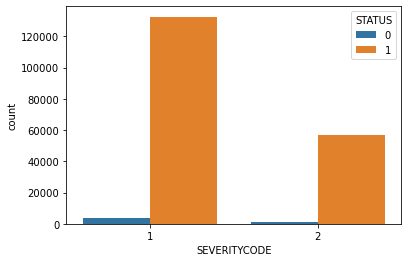

In [135]:
df['STATUS'] = df['STATUS'].replace({'Matched': 1, 'Unmatched': 0})

# graph of STATUS in relation to SEVERITYCODE
sn.countplot(data=df, x='SEVERITYCODE', hue='STATUS')

# table of STATUS in relation to SEVERITYCODE
df.groupby(['SEVERITYCODE'])['STATUS'].value_counts(normalize=True).to_frame()

There is good amount of relationship between severitycode and personcount

<h5>PEDCYLCOUNT

SEVERITYCODE
PEDCYLCOUNT SEVERITYCODE              
0           1                 0.717832
            2                 0.282168
1           2                 0.875207
            1                 0.124793
2           2                 1.000000

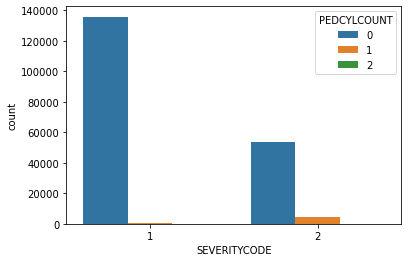

In [16]:
# no missing values or catagorical values to fill or encode use as EDA

# graph of PEDCYLCOUNT in relation to SEVERITYCODE
sn.countplot(data=df, x='SEVERITYCODE', hue='PEDCYLCOUNT')

# table of PEDCYLCOUNT in relation to SEVERITYCODE
df.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

<h5> HITPARKEDCAR

SEVERITYCODE
HITPARKEDCAR SEVERITYCODE              
0            1                 0.691983
             2                 0.308017
1            1                 0.937916
             2                 0.062084

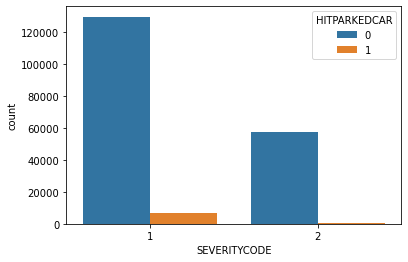

In [136]:
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].replace({'Y': 1, 'N': 0})

# graph of HITPARKEDCAR in relation to SEVERITYCODE
sn.countplot(data=df, x='SEVERITYCODE', hue='HITPARKEDCAR')

# table of HITPARKEDCAR in relation to SEVERITYCODE
df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

This feature will likely be a feature that overfits the model since we already have 3 features(collisiontype, st_colcode, sdot_colcode). 

<h5> INCDTTM

In [137]:
# split INCDTTM to date time am/pm
df[['Date','time', 'am/pm']] = df.INCDTTM.str.split(" ",expand=True,)
# split date into MONTH DATE and YEAR
df[['MONTH', 'DATE', 'YEAR']] = df.Date.str.split("/",expand=True,)
# we only need MONTH and DATE so we will delete the Date and YEAR
df.drop(['Date', 'YEAR'], axis=1, inplace=True)
# extra hour out of time
df[['HOUR', 'MIN', 'SEC']] = df.time.str.split(":",expand=True,)
# combine hour and am/pm to form time
df['TIME'] = df['HOUR'] + df['am/pm']
# delete all the extra columns that we don't need from spliting
df.drop(['MIN', 'SEC', 'time', 'am/pm', 'HOUR', 'INCDTTM'], axis=1, inplace=True)

In [138]:
# conver to military time for furter preprosesing
df['TIME'] = df['TIME'].replace({'1AM': 1, '2AM': 2, '3AM': 3, '4AM': 4, '5AM': 5, '6AM': 6,  
                                 '8AM': 8, '9AM': 9, '10AM': 10, '11AM': 11, '12AM': 0,
                                 '1PM': 13, '2PM': 14, '3PM': 15, '4PM': 16, '5PM': 17, 
                                 '6PM': 18, '7PM': 19, '8PM': 20, '9PM': 21, '10PM': 22,
                                 '7AM': 7, '11PM': 23, '12PM': 12})



In [139]:
df['TIME'] = df['TIME'].fillna(17)

C:\Users\leo\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


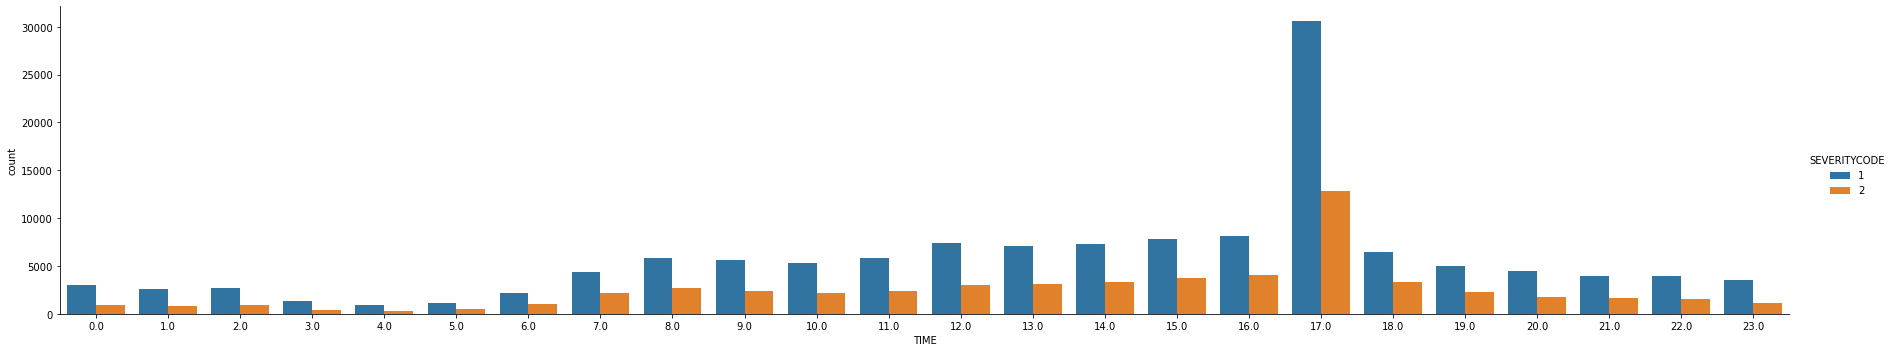

In [20]:
# graph of time(hours) in relation to SEVERITYCODE
g = sn.factorplot(x="TIME", data=df, aspect=5, kind='count', hue='SEVERITYCODE')

at 11 clock is where serevierty code 1 and 2 differs, this is an important feature we will want to add to our model later on

SEVERITYCODE
MONTH SEVERITYCODE              
1     1                    11704
      2                     4703
10    1                    12273
      2                     5495
11    1                    11683
      2                     4899
12    1                    11202
      2                     4343
2     1                    10293
      2                     4097
3     1                    11415
      2                     4735
4     1                    11216
      2                     4762
5     1                    11567
      2                     5196
6     1                    11638
      2                     4928
7     1                    11227
      2                     5137
8     1                    11214
      2                     5082
9     1                    11053
      2                     4811

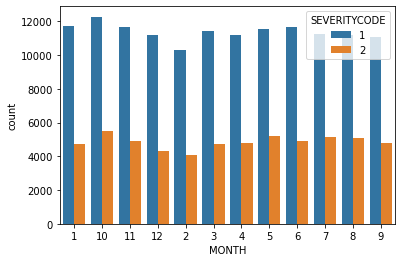

In [58]:
sn.countplot(data=df, x='MONTH', hue='SEVERITYCODE')


df.groupby(['MONTH'])['SEVERITYCODE'].value_counts().to_frame()

C:\Users\leo\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


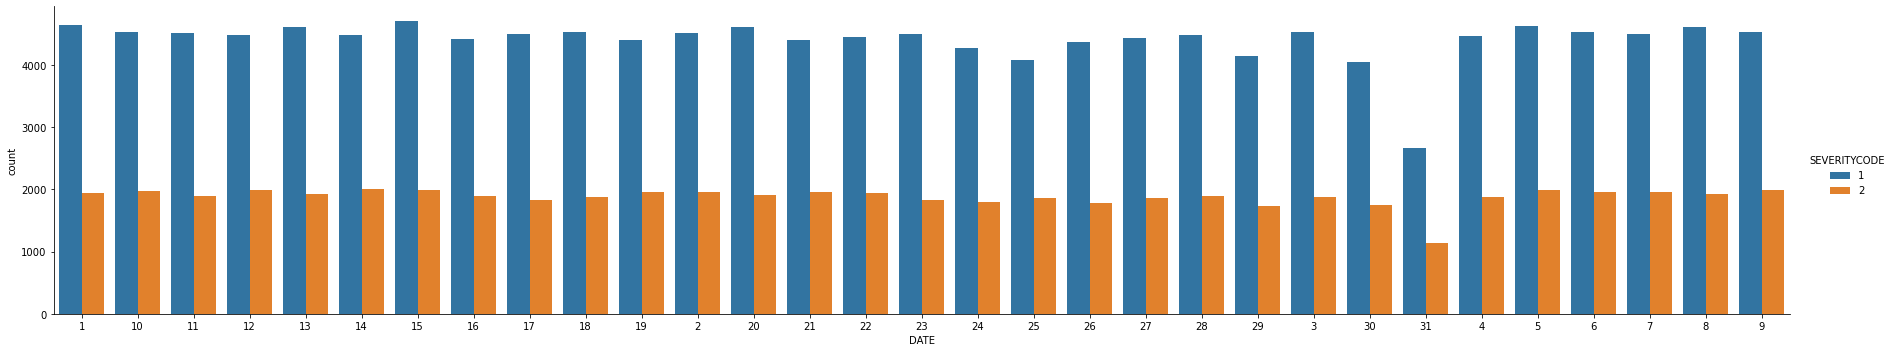

In [59]:
# graph of date in relation to SEVERITYCODE
g = sn.factorplot("DATE", data=df, aspect=5.0, kind='count', hue='SEVERITYCODE')

Initally I thought there would be a huge corrolation between date, month, hours and severitycode. The reality is that there is very little.

In [141]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

df['ST_COLCODE'] = encoder.fit_transform(pd.to_numeric(df['ST_COLCODE'],errors='coerce'))
df['MONTH'] = encoder.fit_transform(pd.to_numeric(df['MONTH'],errors='coerce'))
df['DATE'] = encoder.fit_transform(pd.to_numeric(df['DATE'],errors='coerce'))



# 5. Feature Selection via:
    I. Univariate Selection
    II. Feature Importance
    III. Correlation Matrix with Heatmap

In [142]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column 
X.drop(columns=['X'], inplace=True)

**I. Univariate Selection**

In [143]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs          Score
18          DATE  127876.506288
14     LIGHTCOND   27824.590356
11     UNDERINFL   14041.748142
15    ST_COLCODE   11039.376330
10  SDOT_COLCODE    7809.095608
12       WEATHER    1831.842532
13      ROADCOND    1612.941220
9   JUNCTIONTYPE    1345.871293
16  HITPARKEDCAR    1013.580125
8       VEHCOUNT     818.068109


**II. Feature Importance**

[0.01690958 0.31132045 0.0114047  0.00747677 0.02475602 0.06178299
 0.00203527 0.00113653 0.02303415 0.02776939 0.05255617 0.00317681
 0.02587125 0.01359041 0.03993886 0.02641058 0.00308202 0.13590112
 0.21184693]


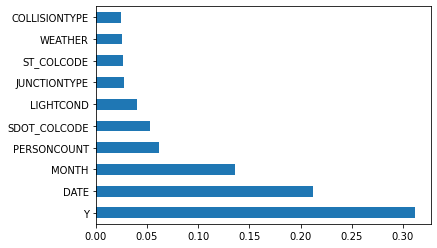

In [145]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**III. Correlation Matrix with Heatmap**

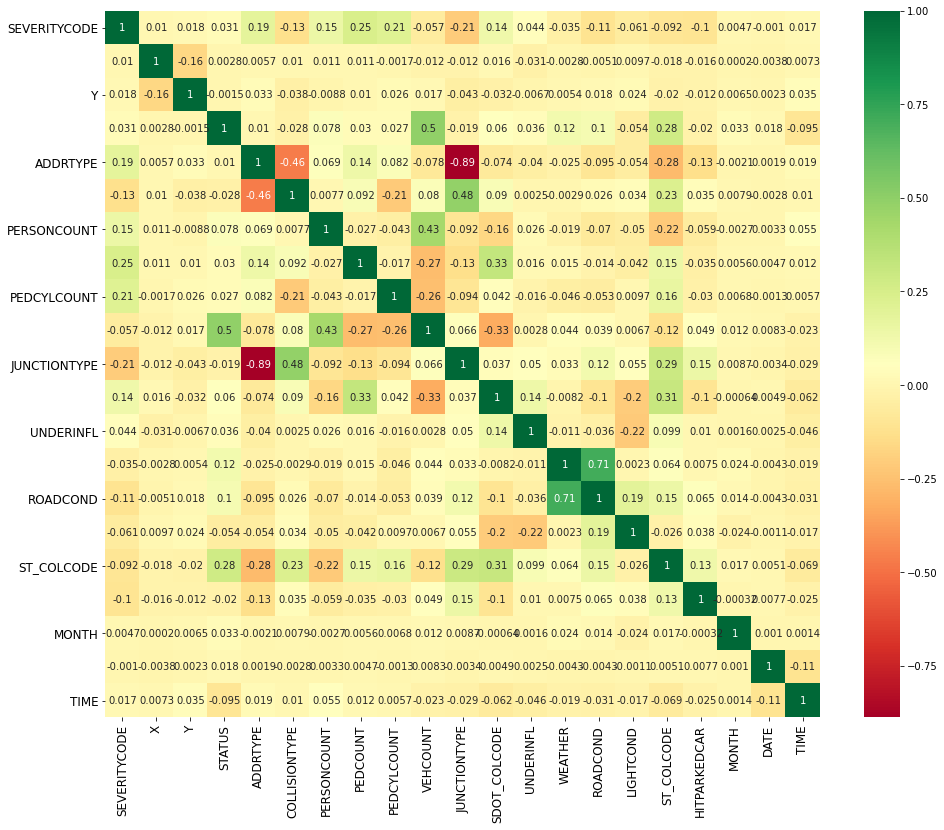

In [144]:
sn.heatmap(df.corr(), cmap='RdYlGn', annot=True)
fig=plt.gcf()
fig.set_size_inches(16,13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As we learned in feature engineering, there are only a handful of features that shows enough relationship for training our model. So lets go ahead and select those features and train them.

# 6. Model Building

In [149]:
# spliting train test data
df_train = df.sample(frac = 0.8) 
df_test = df.drop(df_train.index)

display(df_train.shape)
display(df_test.shape)

(155738, 21)

(38935, 21)

In [150]:
feature_selected = df_train[['ST_COLCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 
                             'JUNCTIONTYPE', 'SDOT_COLCODE', 'HITPARKEDCAR', 'ROADCOND']]

# Univariate_feature = df_train[['ST_COLCODE', 'DATE', 'LIGHTCOND', 'UNDERINFL', 'WEATHER',
#                               'SDOT_COLCODE', 'VEHCOUNT', 'HITPARKEDCAR', 'ROADCOND', 'JUNCTIONTYPE']]

# feature_Importance = df_train[['ST_COLCODE', 'DATE', 'LIGHTCOND', 'WEATHER', 'COLLISIONTYPE',
#                               'SDOT_COLCODE', 'HITPARKEDCAR', 'ROADCOND', 'JUNCTIONTYPE', 'Y']]

feature_selected

,ST_COLCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,JUNCTIONTYPE,SDOT_COLCODE,HITPARKEDCAR,ROADCOND
151359,8,0,5,2,0,5,13,1,2
92426,8,0,5,2,0,5,11,0,2
116648,4,0,7,3,0,4,14,0,1
149999,4,0,7,4,0,4,14,0,1
184333,5,1,3,3,0,1,11,0,0
...,...,...,...,...,...,...,...,...,...
47944,1,1,0,2,0,1,11,0,0
74069,8,0,5,2,0,5,15,0,0
188862,4,0,7,3,0,5,14,0,1
18652,8,0,5,2,0,2,13,0,0


In [151]:
# training answers
y = df_train['SEVERITYCODE'].values
y[0:5]

array([1, 1, 2, 1, 1], dtype=int64)

In [152]:
from sklearn import preprocessing

X = feature_selected
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.80318122, -0.70976803,  0.17590162, -0.37460776, -0.1878209 ,
         0.88452312, -0.05999167,  5.09538518,  2.40937422],
       [ 0.80318122, -0.70976803,  0.17590162, -0.37460776, -0.1878209 ,
         0.88452312, -0.42611035, -0.19625602,  2.40937422],
       [-0.46701912, -0.70976803,  0.90287577,  0.53456432, -0.1878209 ,
         0.34202703,  0.12306767, -0.19625602,  0.87882441],
       [-0.46701912, -0.70976803,  0.90287577,  1.44373639, -0.1878209 ,
         0.34202703,  0.12306767, -0.19625602,  0.87882441],
       [-0.14946904,  1.36178095, -0.55107253,  0.53456432, -0.1878209 ,
        -1.28546124, -0.42611035, -0.19625602, -0.6517254 ]])

<h3>Classification via: </h3> 
K Nearest Neighbor(KNN) <br/>
Decision Tree <br/>
Support Vector Machine <br/>
Logistic Regression

In [146]:
from sklearn.model_selection import train_test_split

KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [158]:
# test the model
KNN_model.score(X_test, y_test)

0.7360344163349172

Let's see if we can do better with different parameter n that is build in KNN model.

<ipython-input-64-5dbd9cf631cb>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


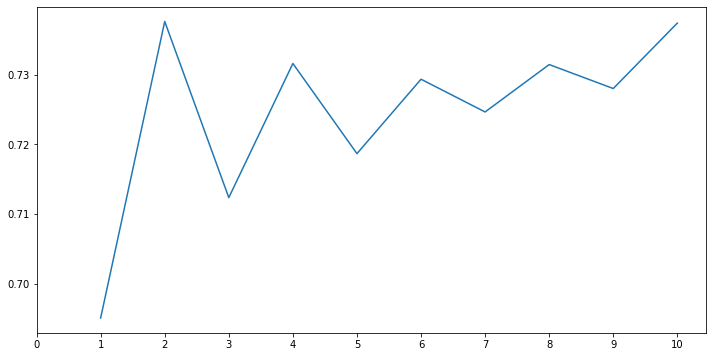

Accuracies for different values of n are: [0.69505586 0.73763966 0.71234108 0.73160396 0.7186593  0.72934378
 0.72464364 0.73144985 0.72800822 0.7374085 ] with the max value as  0.7376396558366508


In [64]:
from sklearn import metrics

a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    KNN_model=KNeighborsClassifier(n_neighbors=i) 
    KNN_model.fit(X_train, y_train)
    prediction=KNN_model.predict(test_Feature)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_true)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

Decision Tree

In [153]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# train the model
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [154]:
# test the model
tree_model.score(X_test, y_test)

0.759727751380506

Linear SVM

In [159]:
from sklearn import svm

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# train the model
svm_model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
svm_model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [160]:
# test the model
svm_model.score(X_test, y_test)

0.72987029664826

Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# train the model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [156]:
# test the model
LR_model.score(X_test, y_test)

0.7279119044561448

# 7. Model Evaluation

In [161]:
# test models on new datas
feature_selected = df_test[['ST_COLCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 
                             'JUNCTIONTYPE', 'SDOT_COLCODE', 'HITPARKEDCAR', 'ROADCOND']]

test_Feature = feature_selected
test_Feature = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_Feature.shape

(38935, 9)

In [162]:
y_true = df_test['SEVERITYCODE'].values
y_true.shape

(38935,)

In [163]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# knn F1&jaccard score
knn_yhat = KNN_model.predict(test_Feature)
knn_f1 = round(f1_score(y_true, knn_yhat, average='weighted'), 2)
knn_jaccard = round(jaccard_score(y_true, knn_yhat), 2)

# Decision Tree F1&jaccard score
DT_yhat = tree_model.predict(test_Feature)
DT_f1 = round(f1_score(y_true, DT_yhat, average='weighted'), 2)
DT_jaccard = round(jaccard_score(y_true, DT_yhat), 2)

# Support Vector Machine Tree F1&jaccard score
svm_yhat = svm_model.predict(test_Feature)
svm_f1 = round(f1_score(y_true, svm_yhat, average='weighted'), 2)
svm_jaccard = round(jaccard_score(y_true, svm_yhat), 2)

# Logistic Regression F1&jaccard& logloss score
LR_yhat = LR_model.predict(test_Feature)
LR_prob = LR_model.predict_proba(test_Feature)
LR_f1 = round(f1_score(y_true, LR_yhat, average='weighted'), 2)
LR_jaccard = round(jaccard_score(y_true, LR_yhat), 2)

# log loss
loss = log_loss(y_true, LR_prob)

In [164]:
# display reports
df_report = pd.DataFrame(np.array([['KNN', knn_jaccard, knn_f1,'NA'], 
                                   ['Decision Tree',DT_jaccard, DT_f1,'NA'], 
                                   ['SVM',svm_f1, svm_f1,'NA'],
                                   ["LogisticRegression", LR_jaccard, LR_f1, loss]]),
                           columns=['Algorithm', 'Jaccard', 'F1-score', "LogLoss"])
df_report.set_index('Algorithm')

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.68,0.72,NA
Decision Tree,0.72,0.73,NA
SVM,0.64,0.64,NA
LogisticRegression,0.71,0.67,0.5392616388994019


# 8. Conclusion

In the beginning of this journey, we dived deep into the land of data provided by SPD(seattle police department) and found ourselves swimming among an ocean of features. Some seem promising, others not so much. Initially, features such as weather, X(longitude), Y(latitude), UNDERINFL(under influence), HITPARKEDCAR, ROADCOND, and LIGHTCOND seem promising while arbitrary features such as ST_COLCODE, SDOT_COLCODE, STATUS seemed unrelated or has weak connections at best. It turns out that neither was my initial intuition right nor is it wrong. After all, I think this is what makes good findings in the realm of statistics: surprising but not outlandish.

Despite what "Feature Importance" feature selection technique is telling me, I spent a great amount of time only to realize longitude and latitude actually don't matter that much. The first hammer landed on my head when I use folium library to display car accidents via marker cluster(a technique that combine massive amount of tags in dense area into one circle). After filling all the missing/NA values and nearly crashing my laptop only to find no pattern between location and severity code, I presistend to feature selection and even training models. Besides the disappointing results, the final nail to the coffin was violin and box plot, which shows me that the difference between servierty code amount locations are nearly none existence, however it's not a complete waste of time. I did get some promising results from features based on initial intuition such as 'HITPARKEDCAR' and 'ROADCOND'. Ok, let's move on.

Let's go back to the drawing board and use empirical observation. Ah ha, box and count plot tells us that 'ST_COLCODE' and 'SDOT_COLCODE' have a huge difference in severity code 1 and 2. Although I deleted them because I didn't know what to do with them for the greater half of my project. But that doesn't matter, because now we realize our mistakes and once we add these magic in our model we will get a 99% accuracy rate, pop champagne, celebrate, right? No, both feature selection techniques(Univariate_feature & feature_Importance) only show 'ST_COLCODE' and 'SDOT_COLCODE' has average correlation and heatmap showing them as even below average importance. Again my perseverance has been tested, so I went back to feature engineering and encoding hoping this time these 2 features will rise to the top. It didn't, It actually dropped lower than before and remained practically unchanged in the heatmap. At this point even if the model increases 10% in accuracy it's worth it. I got some mix results; while SDOT_SOLCODE provided volatile results, ST_COLCODE is consistently recommended by all 3 feature selection techniques, yes, not a complete waste of time.

So if it's neither super obvious features nor is it super arcain features, then what? It turns out the answer is right in front of me all along(just like the movies). 'ST_COLCODE', 'PEDCOUNT', 'ROADCON', 'LIGHTCOND', 'WEATHER' and few others proved to be indispensable features for the training models. They are not super obvious or arcane. So common sense did prevail, kind of, in the form of 'LIGHTCOND' and 'ROADCOND' but did little to justify features such as 'ST_COLCODE' AND 'PEDCOUNT'(pedestrian count). But wait a minute, doesn't it make sense that cases with more pedestrians also means more injuries? Or cases with ST_COLCODE literally spelled out the nature of the accident(i.e., hitting a cyclist) are followed by a high injury rate? Yes it does. So common sense did win and I would argue should always win. However, sometimes information is hidden in a form that we need technology to clear the clusters of noises in order for our common sense to see things more clearly. In this project, ‘ST_COLCODE’ is such a project. Perhaps that's an even more important lesson, it always has to match common sense. Thank you for reading.
